## AUDIO RECORDING

In [1]:
import sounddevice as sd
from scipy.io import wavfile as wav #import write

In [9]:
#registrare e salvare su file waw 

fs      = 44100 # Sample rate
seconds = 3     # Duration of recording
who = 'LIVIA'   # 'marco', 'LIVIA','rob', 'chris' da cambiare in base a chi registra e sarà la label
num = 100       #numero dei file da registrare

for i in range(num):
    #print("registrazione numero {:>02} iniziata".format(i))
    
    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
    sd.wait()  # Wait until recording is finished
    wav.write('./recordings/'+who+'_output_micro_1_{:>03}.wav'.format(i), fs, myrecording)  # Save as WAV file 
    
    #write('./recordings/'+who+'output_'+str(i+1)+'.wav', fs, myrecording)  # Save as WAV file (se non uso il microfono)
    if i==0:
        print("registrazione iniziata")

    if i==max(range(num)):
        print("registrazione finita")

registrazione iniziata
registrazione finita


## IMMAGE DETECTION

In [95]:
import cv2 as cv
import os

import matplotlib.pyplot as plt

In [104]:
# Caricamento modello per il rilevamento di volti frontali
face_detector = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

In [105]:
def process_frame(img):
    # Gray scale
    f_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Rilevamento volti
    faces = face_detector.detectMultiScale(f_gray) 
    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return img

### singolo scatto

In [123]:
# Collegamento al primo dispositivo di tipo video
cap = cv.VideoCapture(0)
# Acquisizione immagine
result, img = cap.read()
# Processo
img_d = process_frame(img)
# Rilascio del dispositivo
cap.release()

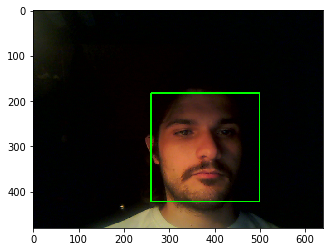

In [124]:
plt.imshow(img_d[:,:,-1::-1])
plt.show()

### Streaming

In [125]:
cap = cv.VideoCapture(0)
while(True):
    # Acquisizione nuovo frame
    r, frame = cap.read()
    # Elaborazione del contenuto
    frame = process_frame(frame)
    # Visualizzazione esterna
    cv.imshow('Video', frame)
    # Interruzione alla pressione del tasto Q
    if cv.waitKey(20) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()